In [6]:
### Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the  dataset have?
import pandas as pd
df = pd.read_excel('/content/flight_price.xlsx')
df.to_csv('flight_price.csv', index=False)
df = pd.read_csv('/content/flight_price.csv')
df.head()
# Get the number of rows and columns
rows, cols = df.shape
print(f"The dataset contains {rows} rows and {cols} columns.")



The dataset contains 10683 rows and 11 columns.


Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')


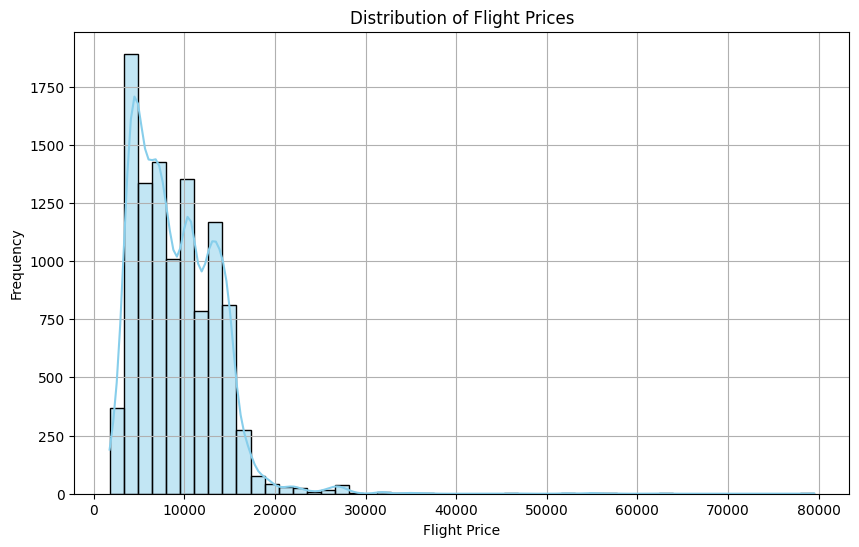

In [7]:
### Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize thedistribution.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('flight_price.csv')

print(df.columns)

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Flight Prices')
plt.xlabel('Flight Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [8]:
### 3. What is the range of prices in the dataset? What is the minimum and maximum price?
min_price = df['Price'].min()
max_price = df['Price'].max()
price_range = max_price - min_price

print(f"Minimum Price: {min_price}")
print(f"Maximum Price: {max_price}")
print(f"Price Range: {price_range}")

Minimum Price: 1759
Maximum Price: 79512
Price Range: 77753


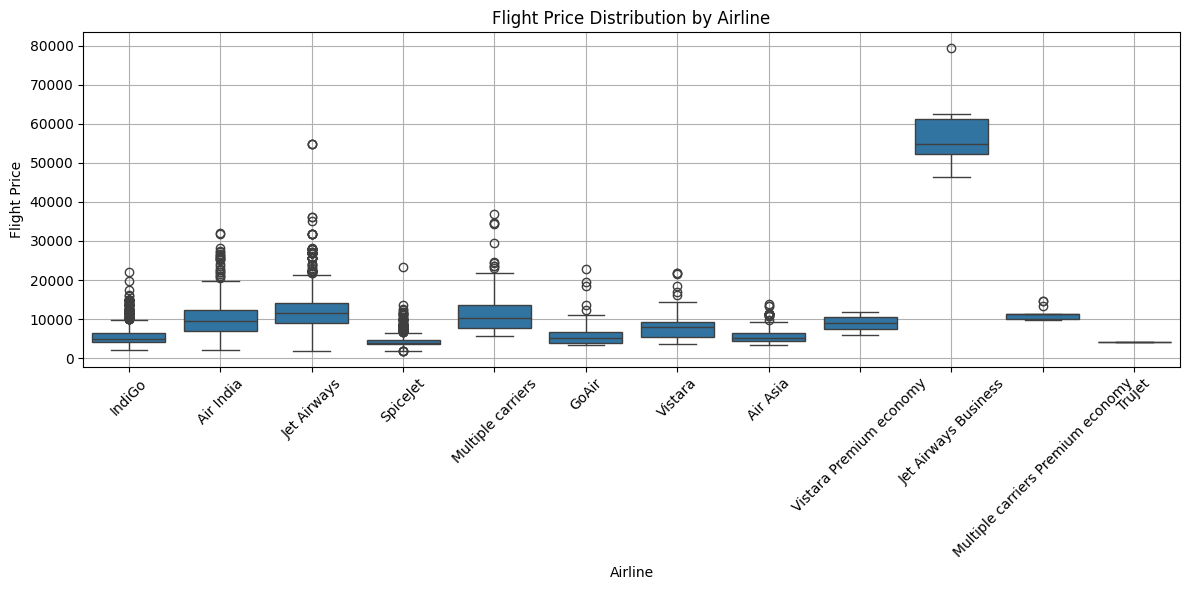

In [9]:
### Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.
# Clean the 'Price' column if necessary (e.g., contains ₹ or commas)
if df['Price'].dtype == 'object':
    df['Price'] = df['Price'].str.replace('₹', '').str.replace(',', '').astype(float)

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Airline', y='Price')
plt.title('Flight Price Distribution by Airline')
plt.xlabel('Airline')
plt.ylabel('Flight Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-11-236102b0cf4a>:12: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], errors='coerce')


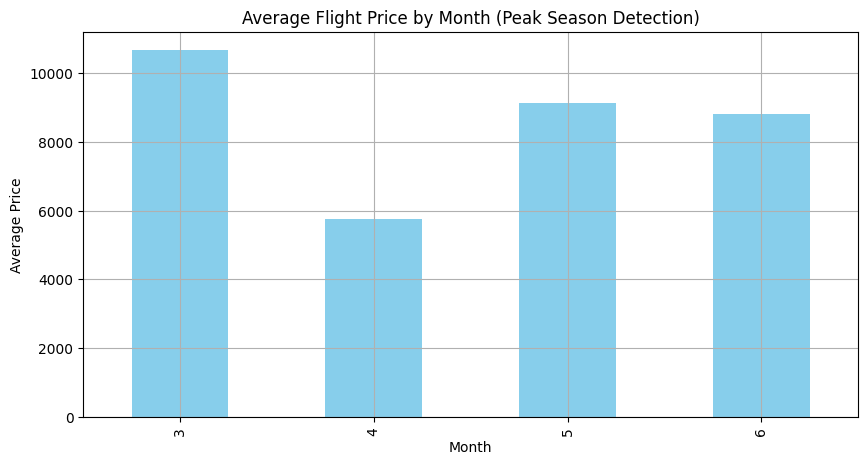

In [11]:
# Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset
# to identify the peak travel season. What features would you analyze to identify the peak season, and how
# would you present your findings to your boss?

import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('flight_price.csv')

# Convert 'Date_of_Journey' to datetime
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], errors='coerce')

# Extract month and day
df['Month'] = df['Date_of_Journey'].dt.month
df['Day'] = df['Date_of_Journey'].dt.day
df['Weekday'] = df['Date_of_Journey'].dt.day_name()

# Group by month and calculate average price
monthly_avg = df.groupby('Month')['Price'].mean()

# Plot
monthly_avg.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Average Flight Price by Month (Peak Season Detection)')
plt.ylabel('Average Price')
plt.xlabel('Month')
plt.grid(True)
plt.show()


<Axes: title={'center': 'Daily Average Flight Price Trend'}, xlabel='Date', ylabel='Average Price'>

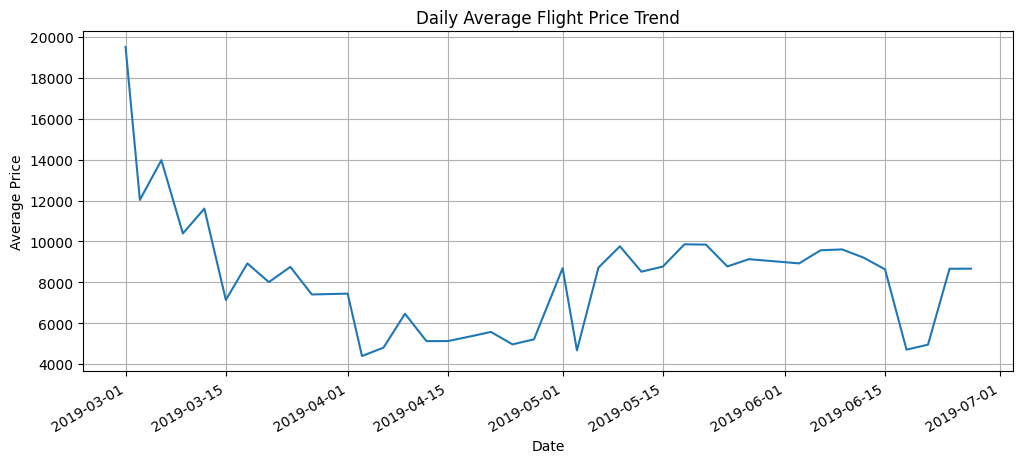

In [12]:
# Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight
# Price dataset to identify any trends in flight prices. What features would you analyze to identify these
# trends, and what visualizations would you use to present your findings to your team?
"""
To analyze trends in flight prices from the Flight Price dataset, we should focus on features that affect time, demand, routes, and services.
"""
# Convert to datetime
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

# Group by date
daily_avg = df.groupby('Date_of_Journey')['Price'].mean()

# Plot
daily_avg.plot(figsize=(12, 5), title='Daily Average Flight Price Trend', ylabel='Average Price', xlabel='Date', grid=True)


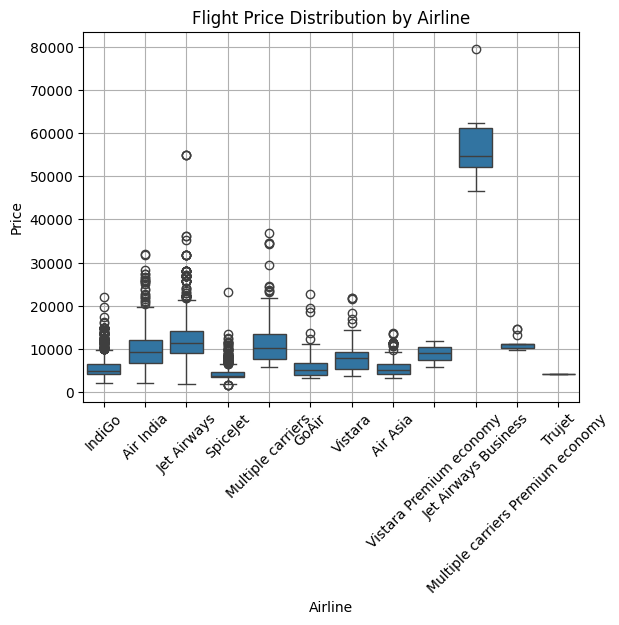

In [13]:
import seaborn as sns
sns.boxplot(x='Airline', y='Price', data=df)
plt.xticks(rotation=45)
plt.title('Flight Price Distribution by Airline')
plt.grid(True)
plt.show()


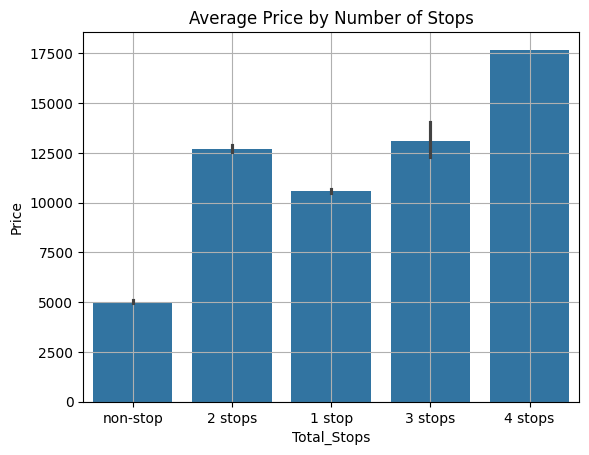

In [14]:
sns.barplot(x='Total_Stops', y='Price', data=df)
plt.title('Average Price by Number of Stops')
plt.grid(True)
plt.show()


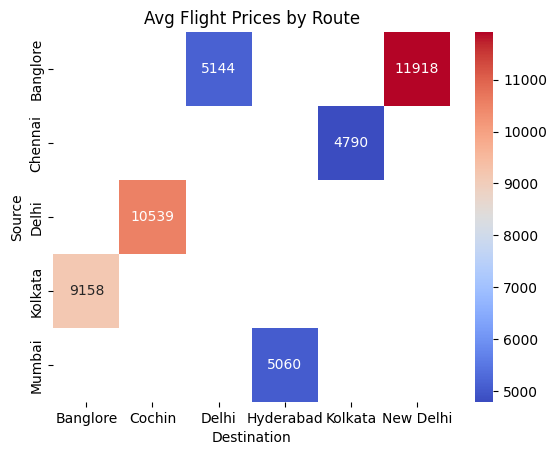

In [15]:
pivot = df.pivot_table(values='Price', index='Source', columns='Destination', aggfunc='mean')
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='coolwarm')
plt.title('Avg Flight Prices by Route')
plt.show()


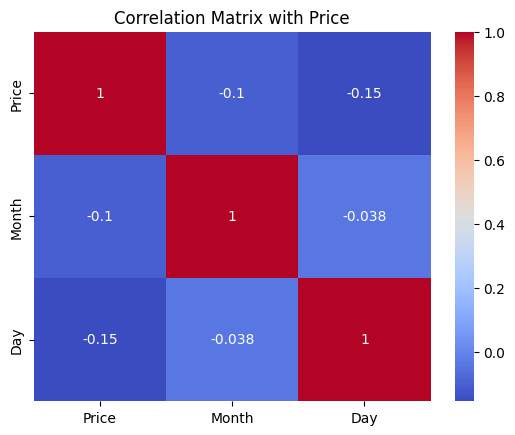

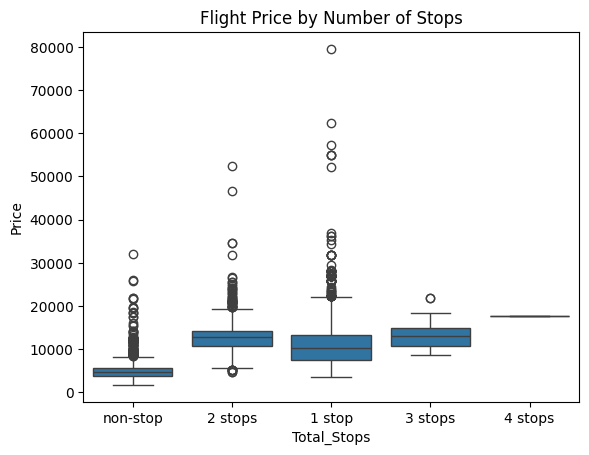

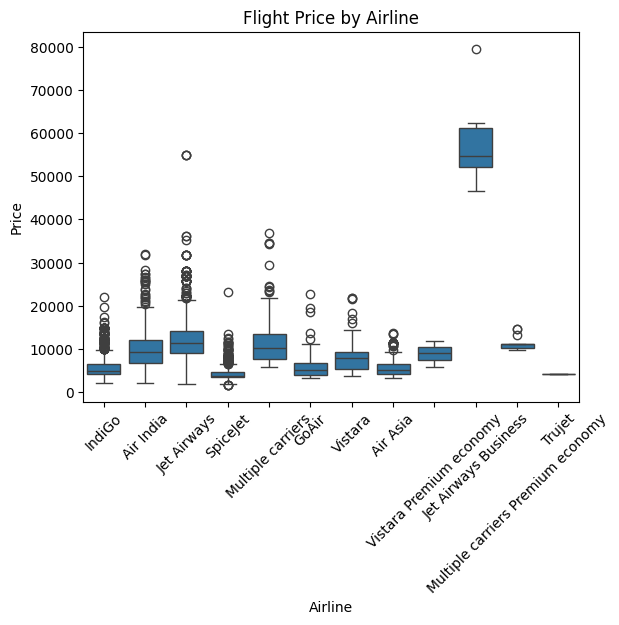

In [17]:
# Q8. You are a data scientist working for an airline company, and you have been asked to analyze the
# Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to
# identify these factors, and how would you present your findings to the management team?
"""
To identify the factors that affect flight prices, your goal as a data scientist is to find relationships between flight prices
and other variables in the dataset using statistical analysis, visualizations, and possibly machine learning models.
"""
# Exploratory Data Analysis (EDA)
# We can use visuals and statistics to understand which features are most influential.

# correlation matrix:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert categorical features to numeric (e.g. LabelEncoding or One-Hot)
# Calculate correlation
correlation = df.corr(numeric_only=True)

# Plot heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix with Price")
plt.show()

#Box plot & bar plot:
sns.boxplot(x='Total_Stops', y='Price', data=df)
plt.title('Flight Price by Number of Stops')
plt.show()

sns.boxplot(x='Airline', y='Price', data=df)
plt.xticks(rotation=45)
plt.title('Flight Price by Airline')
plt.show()

# Time-based trends
df['Journey_Month'] = pd.to_datetime(df['Date_of_Journey']).dt.month
monthly_avg = df.groupby('Journey_Month')['Price'].mean()

monthly_avg.plot(kind='bar', title='Average Flight Price by Month')
plt.ylabel('Avg Price')
plt.xlabel('Month')
plt.show()

#

 How to Present Findings to Management:
Create a clear report or dashboard with the following:

Key Takeaways:
"Flights with more stops are significantly cheaper."

"Premium airlines charge 30–40% more on average."

"Prices peak in May, June, and December, indicating seasonal demand."

"Duration and departure time also impact pricing, especially during peak hours."

Format:
Use visuals: bar charts, boxplots, and feature importance.

Include actionable insights:

Offer discounts on longer-duration flights.

Adjust pricing dynamically based on travel season.

Consider route-based promotional offers.

In [23]:
# Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?
import pandas as pd
df = pd.read_csv('/content/googleplaystore.csv')
df.head()

# Get the dimensions
rows, columns = df.shape

print(f"The dataset has {rows} rows and {columns} columns.")

The dataset has 10841 rows and 13 columns.


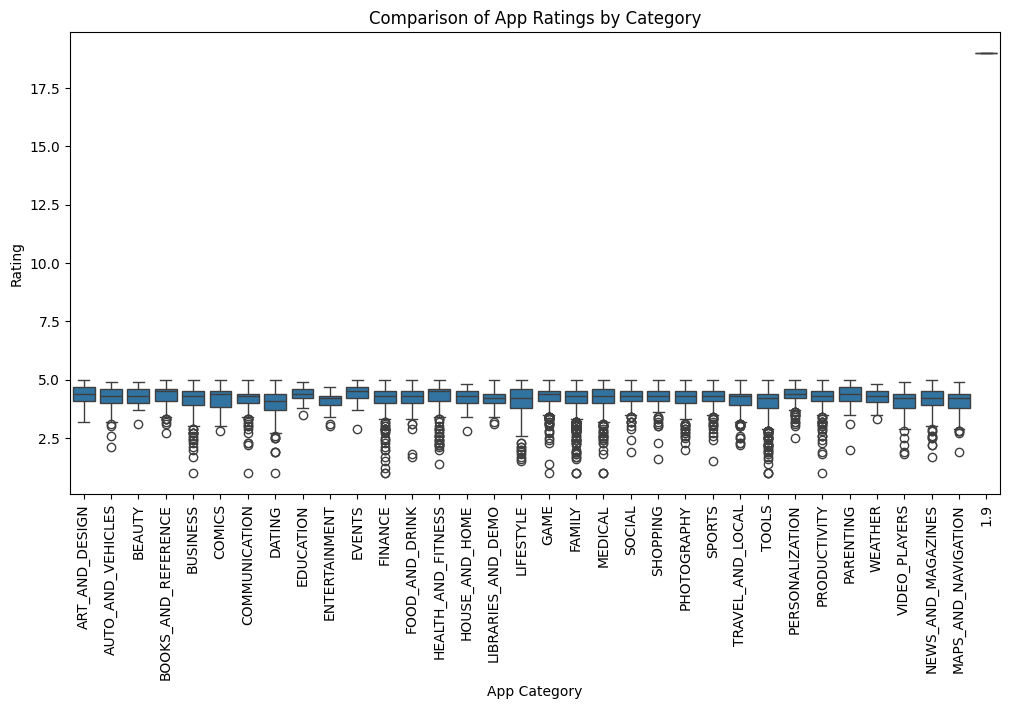

In [24]:
# Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/googleplaystore.csv')

# Ensure the relevant columns are present (Assume columns are 'Category' and 'Rating')
# Clean the data (remove rows with missing values)
df_clean = df.dropna(subset=['Category', 'Rating'])

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean, x='Category', y='Rating')

# Set plot labels and title
plt.xticks(rotation=90)
plt.xlabel('App Category')
plt.ylabel('Rating')
plt.title('Comparison of App Ratings by Category')

# Display the plot
plt.show()


In [25]:
# Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.
# Check for missing values
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print("Missing Values in Each Column:\n", missing_values)

# Get the percentage of missing values for each column
missing_percentage = (df.isnull().mean() * 100)
print("\nPercentage of Missing Values in Each Column:\n", missing_percentage)

Missing Values in Each Column:
 App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Percentage of Missing Values in Each Column:
 App                0.000000
Category           0.000000
Rating            13.596532
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009224
Price              0.000000
Content Rating     0.009224
Genres             0.000000
Last Updated       0.000000
Current Ver        0.073794
Android Ver        0.027673
dtype: float64


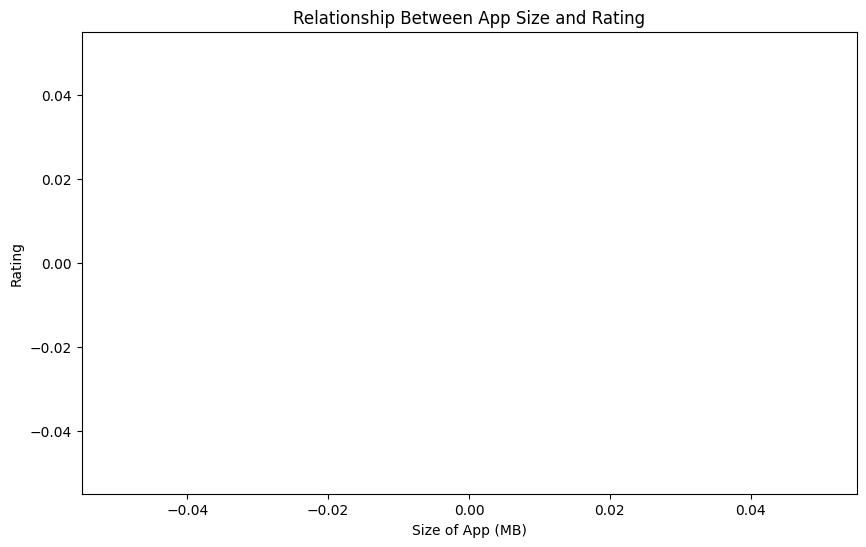

In [30]:
# Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Clean the data (remove rows with missing values for Size and Rating)
df_clean = df.dropna(subset=['Size', 'Rating'])

# Ensure 'Size' is a numerical column, if not, convert it
# If 'Size' contains values like '25M' or '1.5G', you need to convert them to numerical values (in MB or GB)
# Assuming Size is in the 'Size' column, you might need to clean the 'Size' data before proceeding

# For example, convert 'M' and 'G' to numerical values (MB and GB)
# Function to convert size to numeric (in MB)
def convert_size(size):
    if isinstance(size, str):
        size = size.upper().strip()
        if 'M' in size:
            # Remove 'M' and convert to float
            return float(size.replace('M', ''))
        elif 'G' in size:
            # Remove 'G' and convert to float, then convert to MB
            return float(size.replace('G', '')) * 1000
    return None  # For invalid or missing data

# Apply the conversion function to the 'Size' column
df['Size'] = df['Size'].apply(convert_size)

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Size', y='Rating')

# Set plot labels and title
plt.xlabel('Size of App (MB)')
plt.ylabel('Rating')
plt.title('Relationship Between App Size and Rating')

# Display the plot
plt.show()


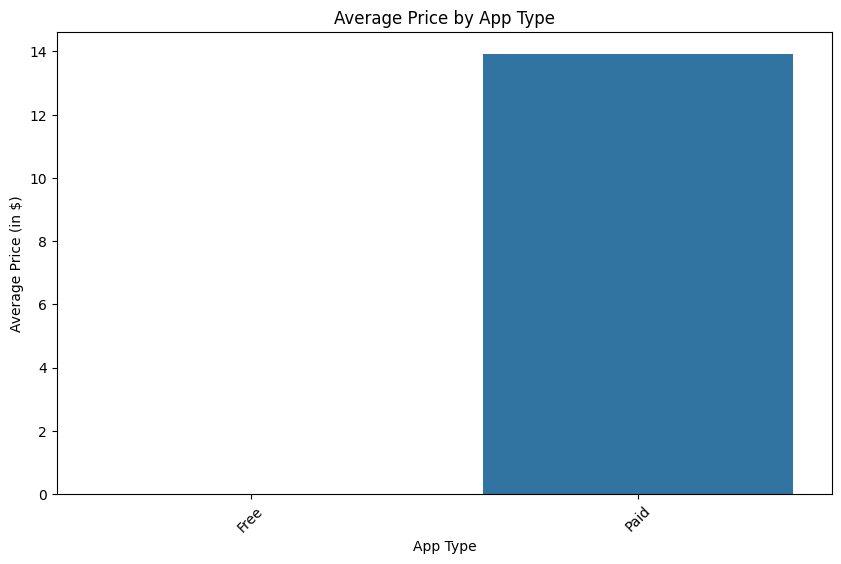

In [32]:
# Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/googleplaystore.csv')

# Clean the 'Price' column (remove '$' symbol and convert to numeric)
df['Price'] = df['Price'].replace({'\$': '', ',': ''}, regex=True)  # Remove dollar sign and commas
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')  # Convert to numeric, invalid values become NaN

# Remove rows with missing or invalid price values
df_clean = df.dropna(subset=['Price'])

# Calculate the average price by app type
avg_price_by_type = df_clean.groupby('Type')['Price'].mean().reset_index()

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Price', data=avg_price_by_type)

# Set plot labels and title
plt.xlabel('App Type')
plt.ylabel('Average Price (in $)')
plt.title('Average Price by App Type')

# Display the plot
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()


In [34]:
# Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps
# with the highest number of installs.
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/googleplaystore.csv')

# Clean the 'Installs' column (remove '+' and ',' then convert to integer)
df['Installs'] = df['Installs'].replace({'\+': '', ',': ''}, regex=True)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Drop rows with missing or invalid install values
df_clean = df.dropna(subset=['Installs'])

# Create a frequency table (sort apps by number of installs)
top_apps = df_clean[['App', 'Installs']].drop_duplicates().sort_values(by='Installs', ascending=False).head(10)

# Display the top 10 most popular apps
print("Top 10 Most Popular Apps by Installs:\n")
print(top_apps.reset_index(drop=True))


Top 10 Most Popular Apps by Installs:

                         App      Installs
0                    Google+  1.000000e+09
1    Google Play Movies & TV  1.000000e+09
2                Google News  1.000000e+09
3          Google Play Games  1.000000e+09
4         Google Street View  1.000000e+09
5              Google Photos  1.000000e+09
6          Google Play Books  1.000000e+09
7  Maps - Navigate & Explore  1.000000e+09
8                    YouTube  1.000000e+09
9                  Instagram  1.000000e+09


### Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach thistask, and what features would you analyze to make recommendations to thecompany?
Ans: \

To help a company **identify the most popular app categories** before launching a new app on the Google Play Store, here's how we can **approach the task step-by-step**, and the **features you'd analyze**:

---

##  **Step-by-Step Approach**

### **1. Understand the Goal**
- The company wants to **maximize popularity**, so we should focus on:
  - Number of **installs** (popularity metric)
  - **User ratings** (quality and satisfaction)
  - **App type** (Free vs Paid)
  - **Content rating** (target audience)

---

### **2. Analyze App Categories**

####  **a. Frequency of Apps per Category**
- Which categories have the **most apps**?
  ```python
  df['Category'].value_counts()
  ```

####  **b. Total and Average Installs per Category**
- Most popular categories based on total installs.
  ```python
  df['Installs'] = df['Installs'].replace({'\+': '', ',': ''}, regex=True).astype(float)
  installs_by_category = df.groupby('Category')['Installs'].sum().sort_values(ascending=False)
  ```

- You can also look at **average installs** to find high-performing categories, not just the ones with the most apps.

####  **c. Average Ratings by Category**
- Measure how satisfied users are with apps in each category.
  ```python
  df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
  ```

####  **d. Free vs Paid Analysis**
- See if popular categories are mostly **free apps**, which tend to get more downloads.

####  **e. Content Rating**
- Analyze which categories are trending among different age groups (e.g., “Everyone,” “Teen”).

---

##  **Features to Focus On**
| Feature          | Why It’s Important                                 |
|------------------|----------------------------------------------------|
| **Category**     | To identify which types of apps are trending       |
| **Installs**     | Shows popularity and user interest                 |
| **Rating**       | Indicates user satisfaction and quality            |
| **Reviews**      | Engagement level and potential word-of-mouth       |
| **Type (Free/Paid)** | Helps decide monetization strategy              |
| **Content Rating** | Helps target the right audience                  |

---

##  Final Recommendations to the Company
After analyzing, you would:
- Recommend **top categories** based on high installs + ratings.
- Suggest whether the app should be **free or paid**.
- Advise on content rating to best reach their **target audience**.

### Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?
Ans: \

##  **Key Features to Analyze**

| Feature | Why It’s Important |
|--------|---------------------|
| **App** | Total number of apps per developer |
| **Installs** | Popularity indicator |
| **Rating** | User satisfaction and app quality |
| **Reviews** | User engagement and feedback volume |
| **Developer Name** (may appear as `App` publisher or `Developer`) | The entity whose performance you're tracking |

---

## **Approach to the Analysis**

### 1. **Aggregate Performance Metrics by Developer**
- Total number of **apps** per developer
- Total and average **installs**
- Average **ratings**
- Total **number of reviews**

```python
# Group by developer
dev_stats = df.groupby('Developer').agg({
    'App': 'count',
    'Installs': 'sum',
    'Rating': 'mean',
    'Reviews': 'sum'
}).rename(columns={
    'App': 'Total_Apps',
    'Installs': 'Total_Installs',
    'Rating': 'Average_Rating',
    'Reviews': 'Total_Reviews'
})

# Sort by total installs
top_developers = dev_stats.sort_values(by='Total_Installs', ascending=False).head(10)
```

---

##  **Recommended Visualizations**

### 1. **Bar Chart: Top 10 Developers by Total Installs**
- Shows which developers have the most successful reach.

```python
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(x=top_developers.index, y='Total_Installs', data=top_developers)
plt.xticks(rotation=45)
plt.title('Top 10 Developers by Total Installs')
plt.ylabel('Total Installs')
plt.xlabel('Developer')
plt.show()
```

---

### 2. **Bubble Plot: Apps vs Rating vs Installs**
- X-axis: number of apps
- Y-axis: average rating
- Bubble size: total installs
- Bubble color: total reviews

Helps visualize **multi-dimensional performance**.

---

### 3. **Heatmap: Developer Success Metrics**
- To show correlation between installs, ratings, reviews, and number of apps.

```python
import seaborn as sns

sns.heatmap(dev_stats.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Developer Success Metrics')
plt.show()
```

### Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?
Ans: \

##  **Key Features to Analyze**

| Feature               | Why It’s Important                                      |
|------------------------|----------------------------------------------------------|
| **Last Updated**       | Can show trends in when apps are most frequently released or updated. |
| **Installs**           | Popularity metric—check what times correlate with high installs. |
| **Category**           | Different app categories may have seasonal trends.      |
| **Reviews / Ratings**  | Help validate user engagement after launch.             

---

##  **Approach to the Analysis**

### 1. **Convert `Last Updated` to Datetime**
```python
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')
```

### 2. **Extract Time Features**
- **Month**
- **Day of Week**
- **Year**

```python
df['Month'] = df['Last Updated'].dt.month
df['Year'] = df['Last Updated'].dt.year
df['Day_of_Week'] = df['Last Updated'].dt.day_name()
```

---

### 3. **Analyze Install Trends by Time**

#### a. **Average Installs per Month**
```python
monthly_installs = df.groupby('Month')['Installs'].mean().sort_values(ascending=False)
```

#### b. **Install Trends by Day of the Week**
```python
weekday_installs = df.groupby('Day_of_Week')['Installs'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
```

---

##  **Recommended Visualizations**

### 1. **Bar Plot: Average Installs by Month**
Shows seasonality or high-performing months.

```python
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.barplot(x=monthly_installs.index, y=monthly_installs.values, palette="viridis")
plt.title('Average Installs by Month')
plt.xlabel('Month')
plt.ylabel('Average Installs')
plt.show()
```

---

### 2. **Bar Plot: Average Installs by Day of the Week**
Helps identify high-traffic days for launching.

```python
plt.figure(figsize=(10,5))
sns.barplot(x=weekday_installs.index, y=weekday_installs.values, palette="magma")
plt.title('Average Installs by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Average Installs')
plt.xticks(rotation=45)
plt.show()
```

---

### 3. **Line Plot: Trend Over Years**
Track how installs have changed over time.

```python
yearly_installs = df.groupby('Year')['Installs'].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=yearly_installs.index, y=yearly_installs.values, marker='o')
plt.title('Average Installs Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Installs')
plt.show()
```